In [155]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

Вам необходимо провести базовый EDA выбранного набора данных.
Требования к анализу:
•	построить не менее 4 визуализаций различных видов;
•	каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
•	по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [157]:
df = pd.read_csv('./archive/2017.csv')
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [159]:
print(df.columns)

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


In [160]:
df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [161]:
df.rename(columns={
    'Happiness.Rank': 'Hapiness_Rank',
    'Happiness.Score': 'Hapiness_Score',
    'Whisker.high' : 'Whisker_High',
    'Whisker.low': 'Whisker_Low',
    'Economy..GDP.per.Capita.': 'Economy_GDP_Per_Capita',
    'Health..Life.Expectancy.':'Health_Life_Expectency',
    'Trust..Government.Corruption.':'Trust_Government_Corruption',
    'Dystopia.Residual':'Dystopia_Residual'    
},inplace = True)
print(df.columns)
df.head(10)

Index(['Country', 'Hapiness_Rank', 'Hapiness_Score', 'Whisker_High',
       'Whisker_Low', 'Economy_GDP_Per_Capita', 'Family',
       'Health_Life_Expectency', 'Freedom', 'Generosity',
       'Trust_Government_Corruption', 'Dystopia_Residual'],
      dtype='object')


,Country,Hapiness_Rank,Hapiness_Score,Whisker_High,Whisker_Low,Economy_GDP_Per_Capita,Family,Health_Life_Expectency,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [165]:
df_country = df.sort_values(by = ['Hapiness_Score'])
df_country

,Country,Hapiness_Rank,Hapiness_Score,Whisker_High,Whisker_Low,Economy_GDP_Per_Capita,Family,Health_Life_Expectency,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
...,...,...,...,...,...,...,...,...,...,...,...,...
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [167]:
#Топ 10 стран с высокой оценкой уровня счастья
df_top = df[['Country','Hapiness_Rank','Hapiness_Score']][:10]
df_top.head()

,Country,Hapiness_Rank,Hapiness_Score
0,Norway,1,7.537
1,Denmark,2,7.522
2,Iceland,3,7.504
3,Switzerland,4,7.494
4,Finland,5,7.469


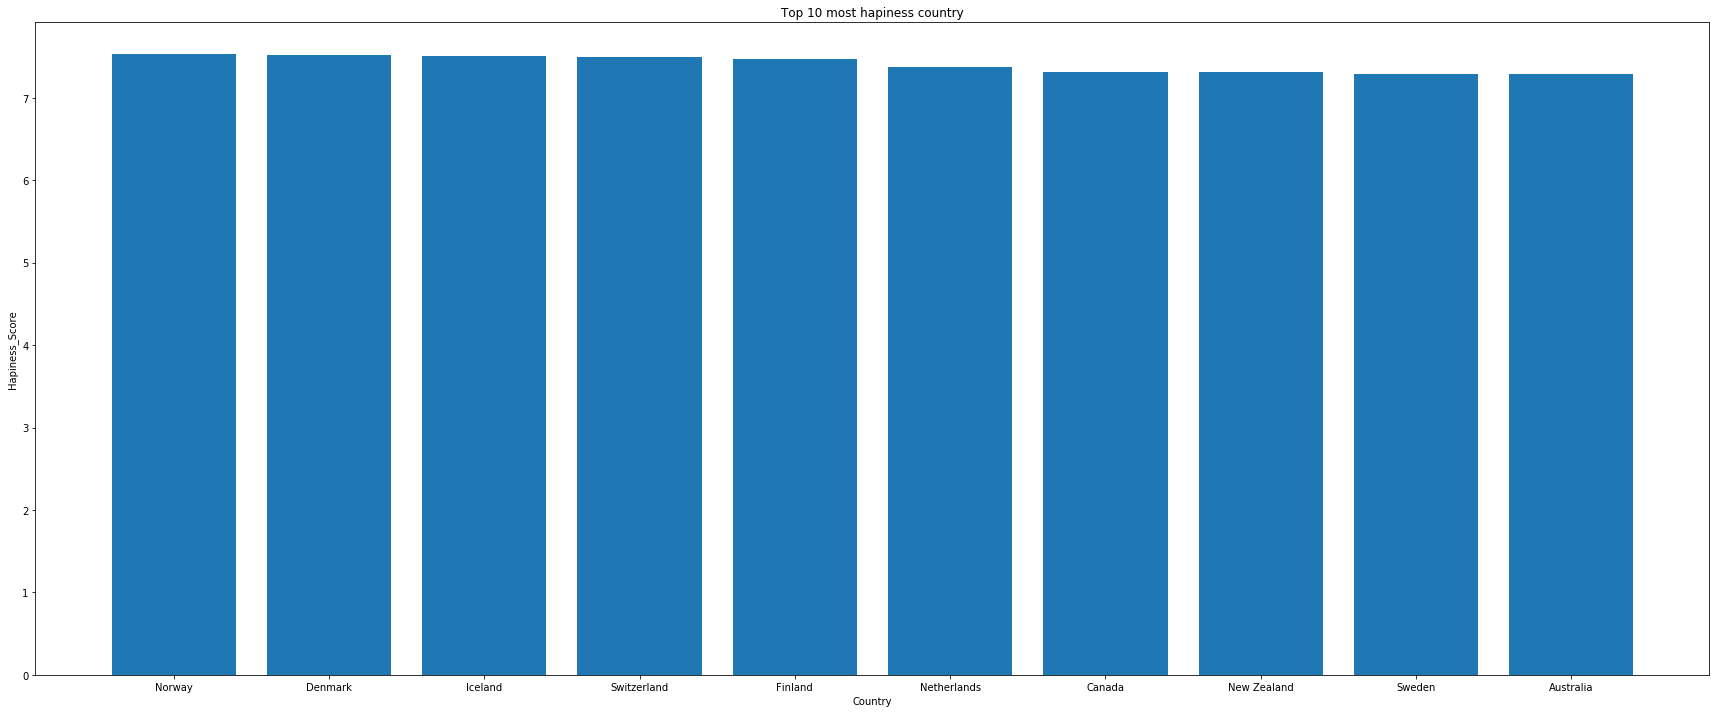

In [168]:
y_pos = np.arange(len(df_top))
plt.figure(figsize=(30,12))
plt.bar(y_pos, df_top['Hapiness_Score'])
plt.xticks(y_pos, df_top['Country'])
plt.xlabel('Country')
plt.ylabel('Hapiness_Score')
plt.title('Top 10 most hapiness country')
plt.show()

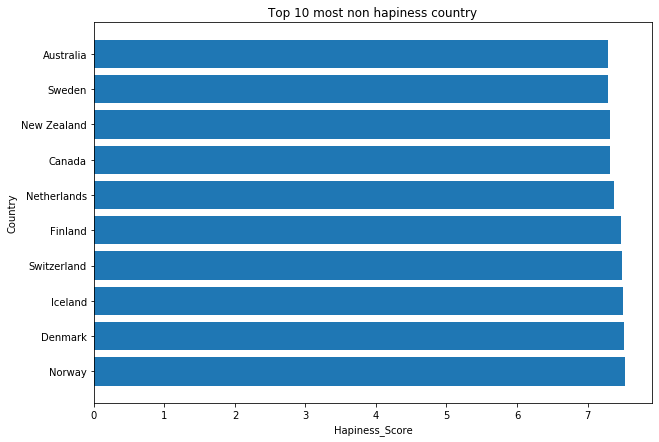

In [169]:
plt.barh(df_top['Country'], df_top['Hapiness_Score'])
plt.title('Top 10 most non hapiness country')
plt.xlabel('Hapiness_Score')
plt.ylabel('Country')
plt.show()

In [170]:
#Топ 10 стран с низкой оценкой уровня счастья
df_bottom = df[['Country','Hapiness_Rank', 'Hapiness_Score']][145:]
df_bottom.head()

,Country,Hapiness_Rank,Hapiness_Score
145,Yemen,146,3.593
146,South Sudan,147,3.591
147,Liberia,148,3.533
148,Guinea,149,3.507
149,Togo,150,3.495


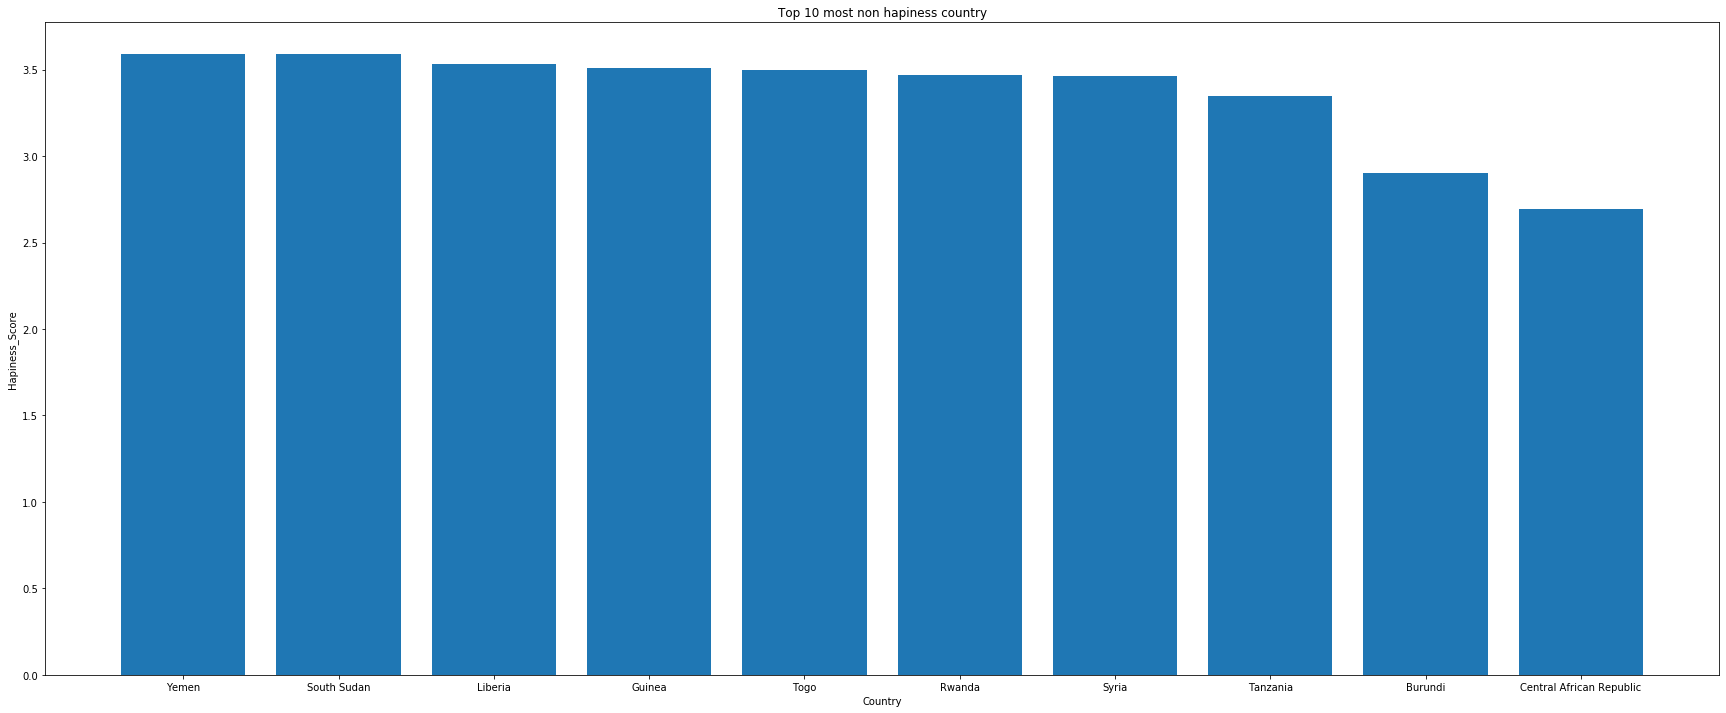

In [171]:
y_pos = np.arange(len(df_bottom))
plt.figure(figsize=(30,12))
plt.bar(y_pos, df_bottom['Hapiness_Score'])
plt.xticks(y_pos, df_bottom['Country'])
plt.xlabel('Country')
plt.ylabel('Hapiness_Score')
plt.title('Top 10 most non hapiness country')
plt.show()

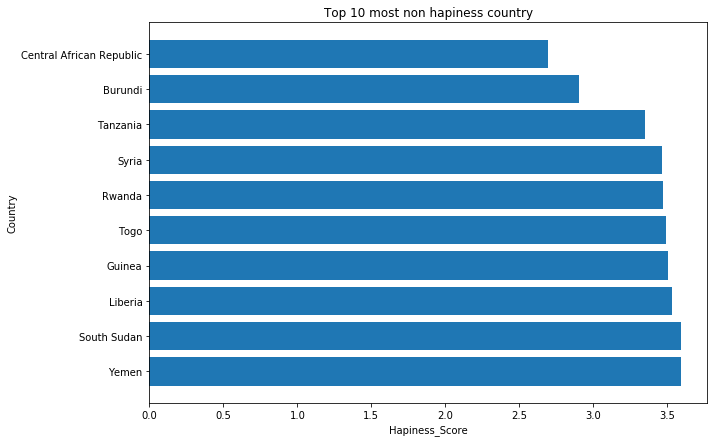

In [172]:
plt.barh(df_bottom['Country'], df_bottom['Hapiness_Score'])
plt.title('Top 10 most non hapiness country')
plt.xlabel('Hapiness_Score')
plt.ylabel('Country')
plt.show()

In [173]:
df_summary = df['Hapiness_Score'].describe()
df_summary

count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: Hapiness_Score, dtype: float64

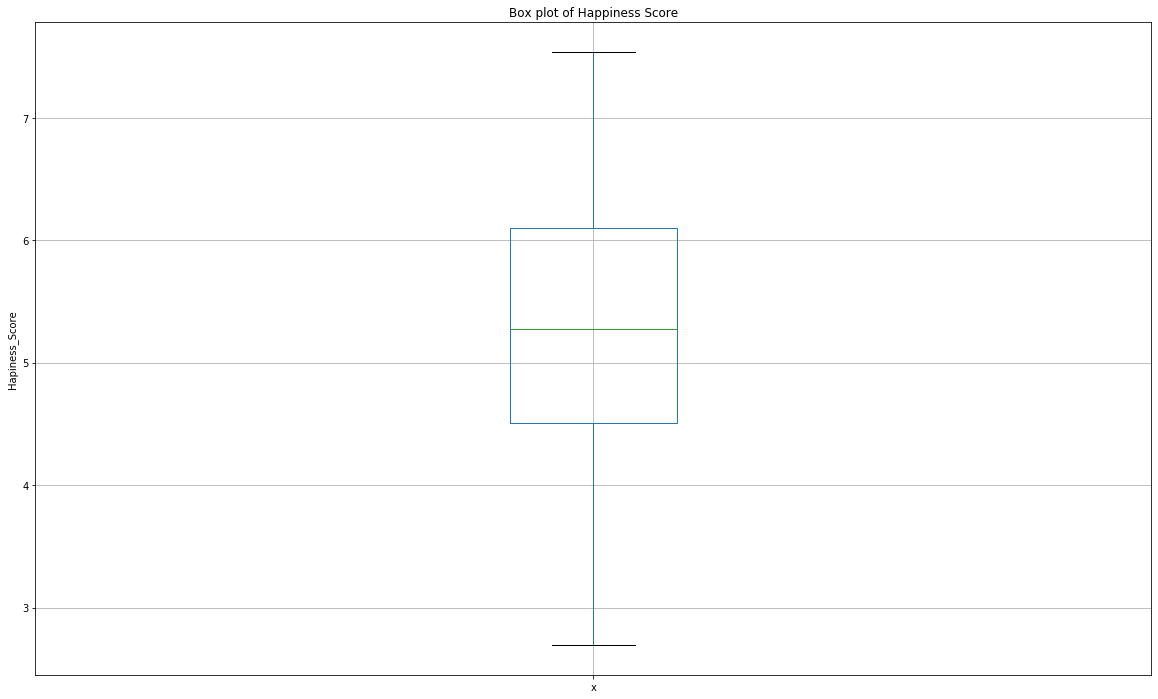

In [174]:
plt.figure(figsize=(20,12))
pd.DataFrame.boxplot(df['Hapiness_Score'])
plt.ylabel('Hapiness_Score')
plt.title('Box plot of Happiness Score')
plt.show()

Text(0.5, 1.0, 'Distribution of Hapiness Score')

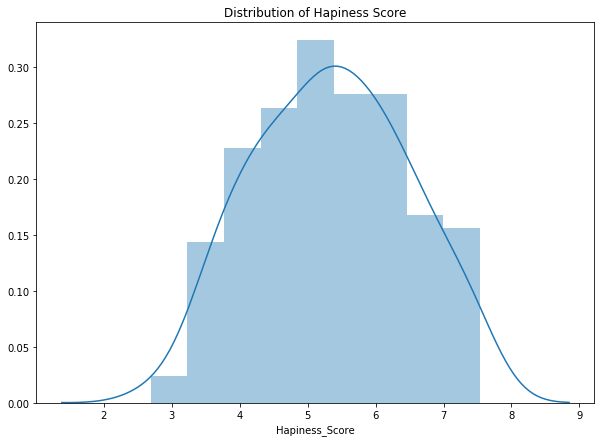

In [175]:
sns.distplot(df['Hapiness_Score'])
plt.title('Distribution of Hapiness Score')

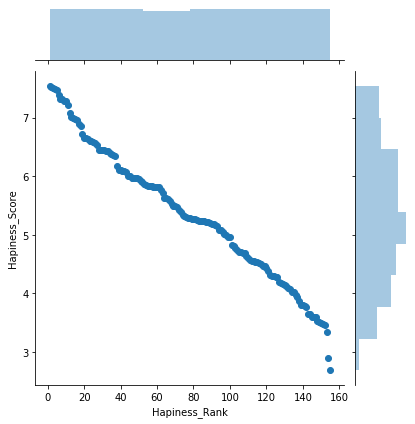

In [176]:
sns.jointplot(x='Hapiness_Rank', y='Hapiness_Score', 
              data=df, kind='scatter')

Text(0.5, 1.0, 'hapiness vs life expectency')

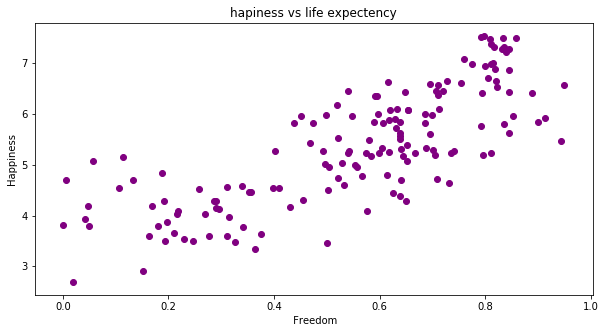

In [178]:
plt.figure(figsize=(10,5))
plt.scatter(data_2017.Health_Life_Expectency,data_2017.Hapiness_Score,color = 'purple')
plt.xlabel(' Freedom')
plt.ylabel('Happiness')
plt.title('hapiness vs life expectency')

Население с высокой продолжительностью жизни дает высокую оценку удовлетворенностью жизни

Text(0.5, 1.0, 'hapiness vs Freedom')

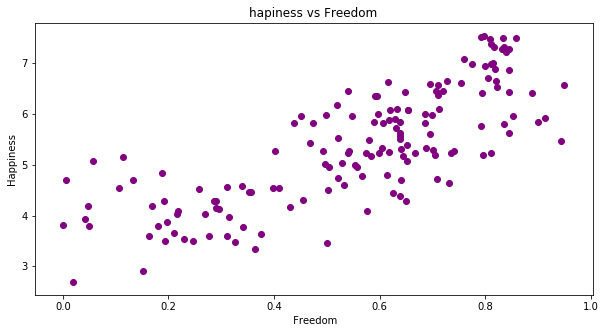

In [93]:
plt.figure(figsize=(10,5))
plt.scatter(data_2017.Health_Life_Expectency,data_2017.Hapiness_Score,color = 'purple')
plt.xlabel(' Freedom')
plt.ylabel('Happiness')
plt.title('hapiness vs Freedom')

Население, которое дает высокую оценку свободе принятия решений, касающися их жизни, сообщают о более высокой удовлетворенностью жизни 


Text(0.5, 1.0, 'hapiness vs Economy..GDP.per.Capita.')

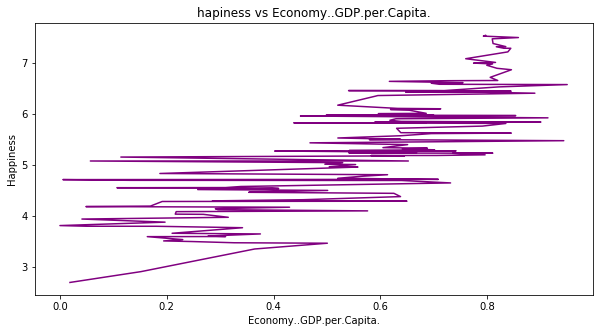

In [179]:
plt.figure(figsize=(10,5))
plt.plot(data_2017.Health_Life_Expectency,data_2017.Hapiness_Score,color = 'purple')
plt.xlabel('Economy..GDP.per.Capita.')
plt.ylabel('Happiness')
plt.title('hapiness vs Economy..GDP.per.Capita.')

Население в более богатых странах (высокий уровень экономического развития страны), как правило, сообщают о более высокой удовлетворенности жизнью, чем в более бедных странах